# PRODIGY INFOTECH

# TASK DONE BY :- PAWAN KUMAR

### PROBLEM STATEMENT

### Build a Decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [2]:
# import all library to requreted
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
import pickle

In [3]:
# loading the data from csv file to pandas dataframs
df= pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
32615,33,services,single,secondary,no,48,yes,no,cellular,17,apr,303,1,-1,0,unknown,no
28983,39,blue-collar,married,unknown,no,0,no,no,cellular,2,feb,731,1,193,3,failure,no
42990,75,retired,divorced,primary,no,37127,no,no,cellular,11,feb,505,1,-1,0,unknown,no


In [5]:
# number of row and columns
df.shape

(45211, 17)

In [6]:
# gatting some information in DataFram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# checking the number of mission value in each columns
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# gatting some statistical measures about the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data analysic 

In [9]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [10]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

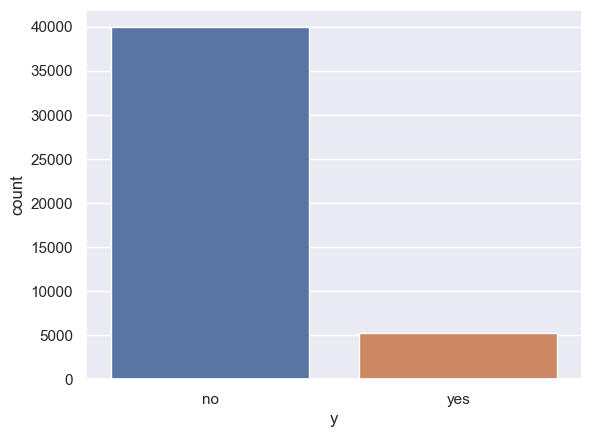

In [11]:
# making a count plot for Y column 
sns.set()
sns.countplot("y",data=df)

In [12]:
# checking no of parcentage yes and no
countyes=len(df[df.y=='yes'])
countno= len(df[df.y=='no'])
print(f'parcentage of yes---->',countyes/len(df.y)*100)
print(f'parcentage of no---->',countno/len(df.y)*100)

parcentage of yes----> 11.698480458295547
parcentage of no----> 88.30151954170445


In [13]:
# Replacing categorical columns 
df.replace({'y':{'no':0,'yes':1}},inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

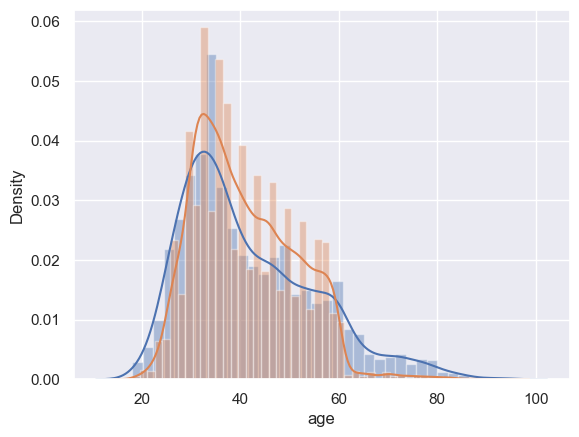

In [14]:
sns.distplot(df['age'][df['y']==1])
sns.distplot(df['age'][df['y']==0])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

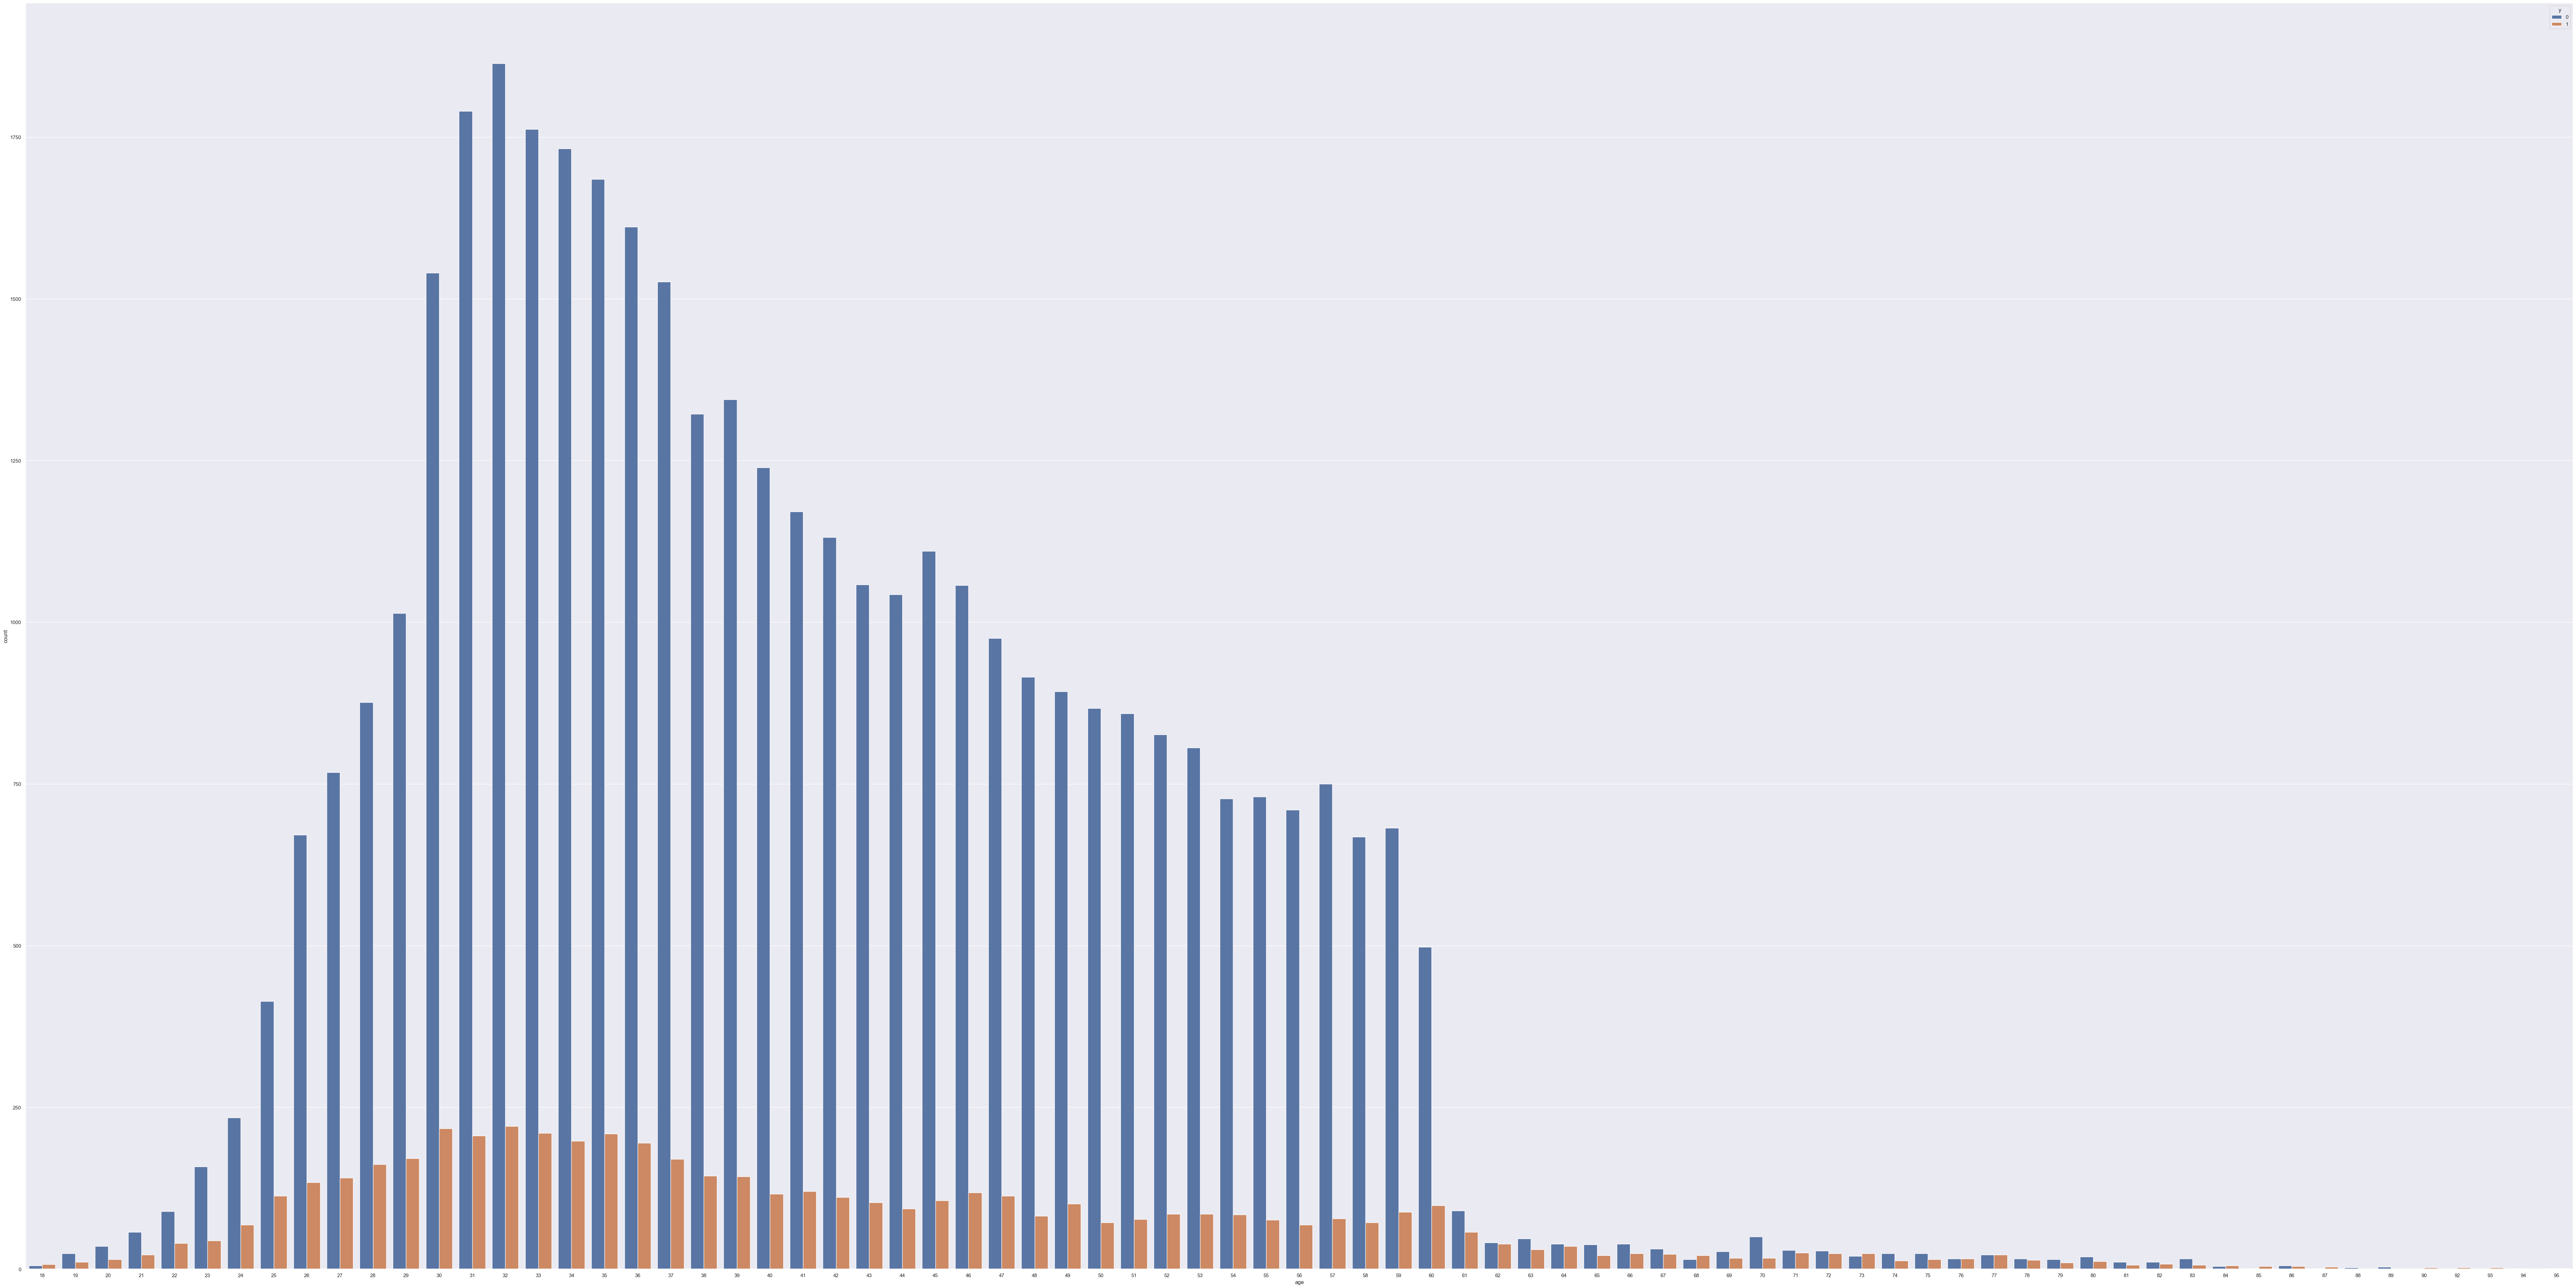

In [15]:
# no of y Age base
plt.figure(figsize=(100,50))
sns.countplot('age',hue='y',data=df)

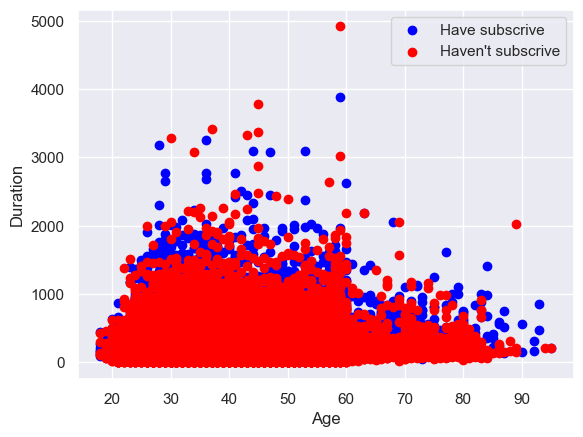

In [16]:
plt.scatter(x=df.age[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.age[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

In [17]:
# checking parcentage of people y in age
df.groupby(['age'])['y'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: y, Length: 77, dtype: float64

In [18]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

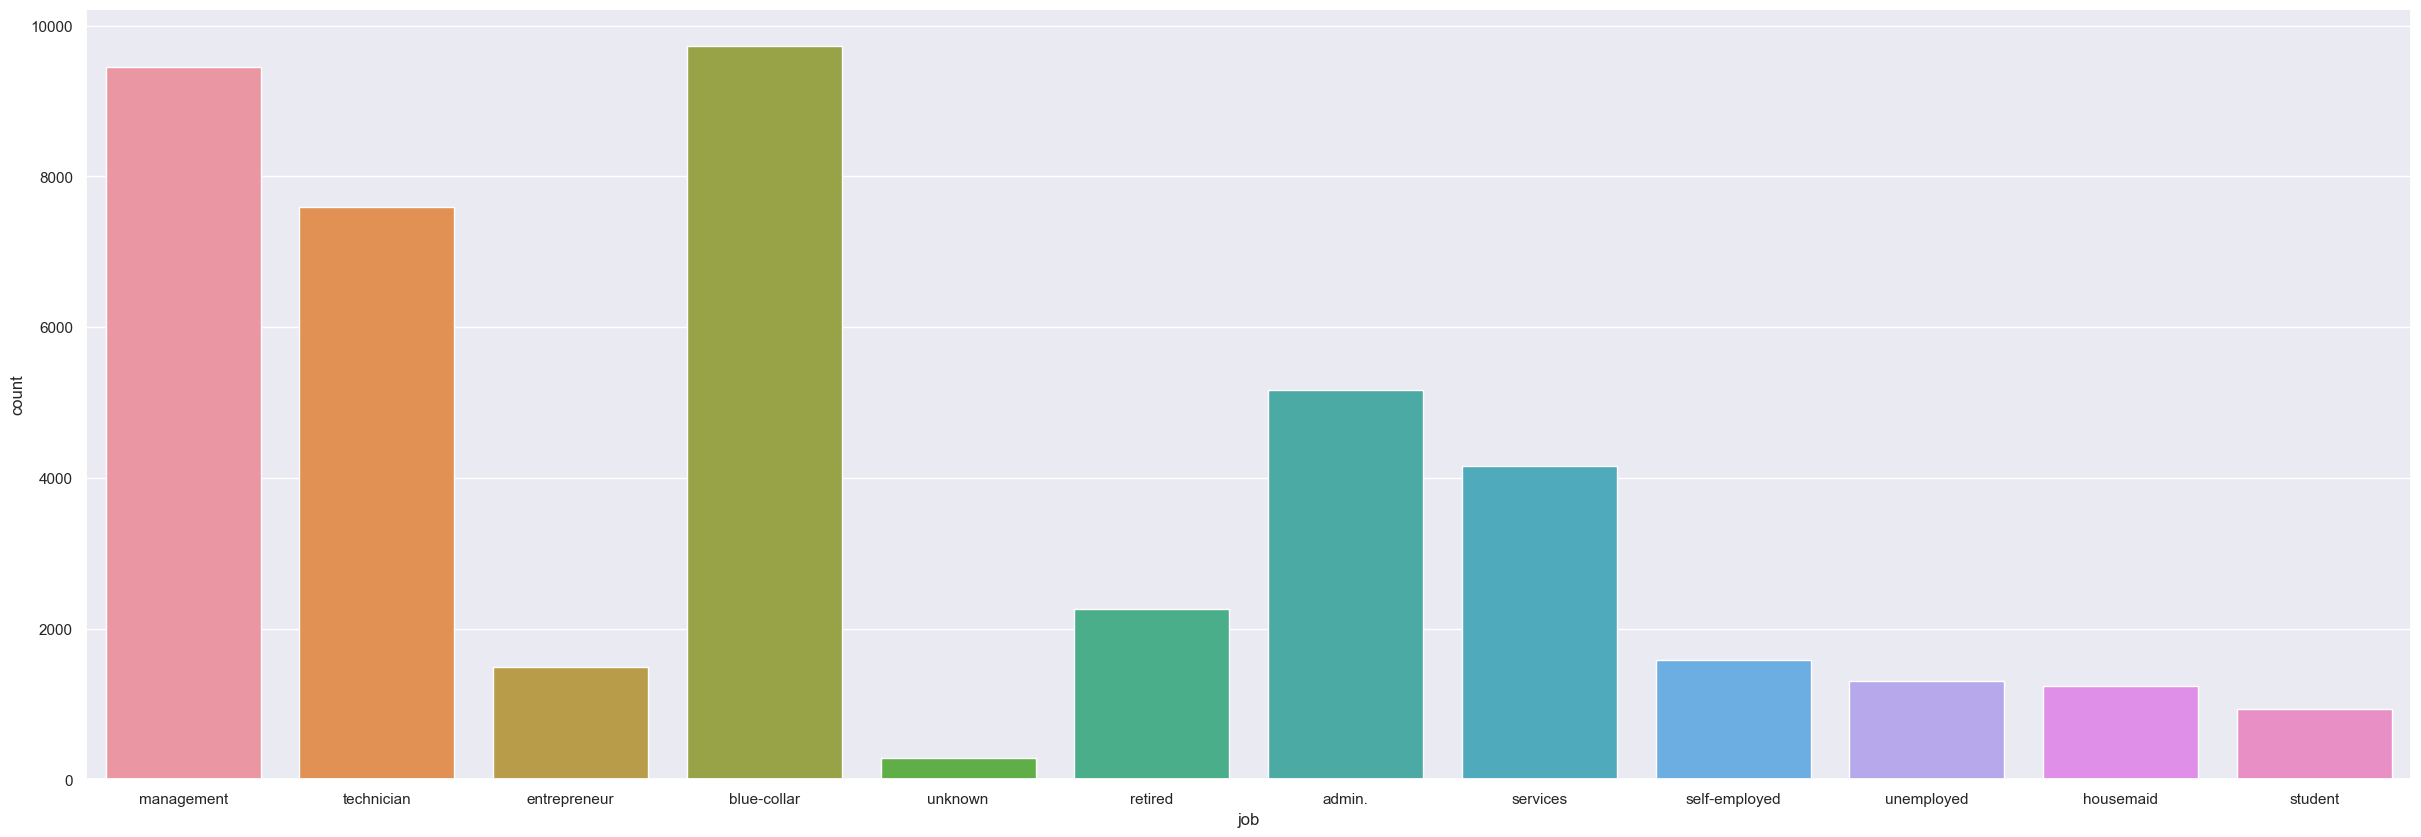

In [19]:
# making a count plot for job column 
plt.figure(figsize=(30,10))
sns.countplot("job",data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

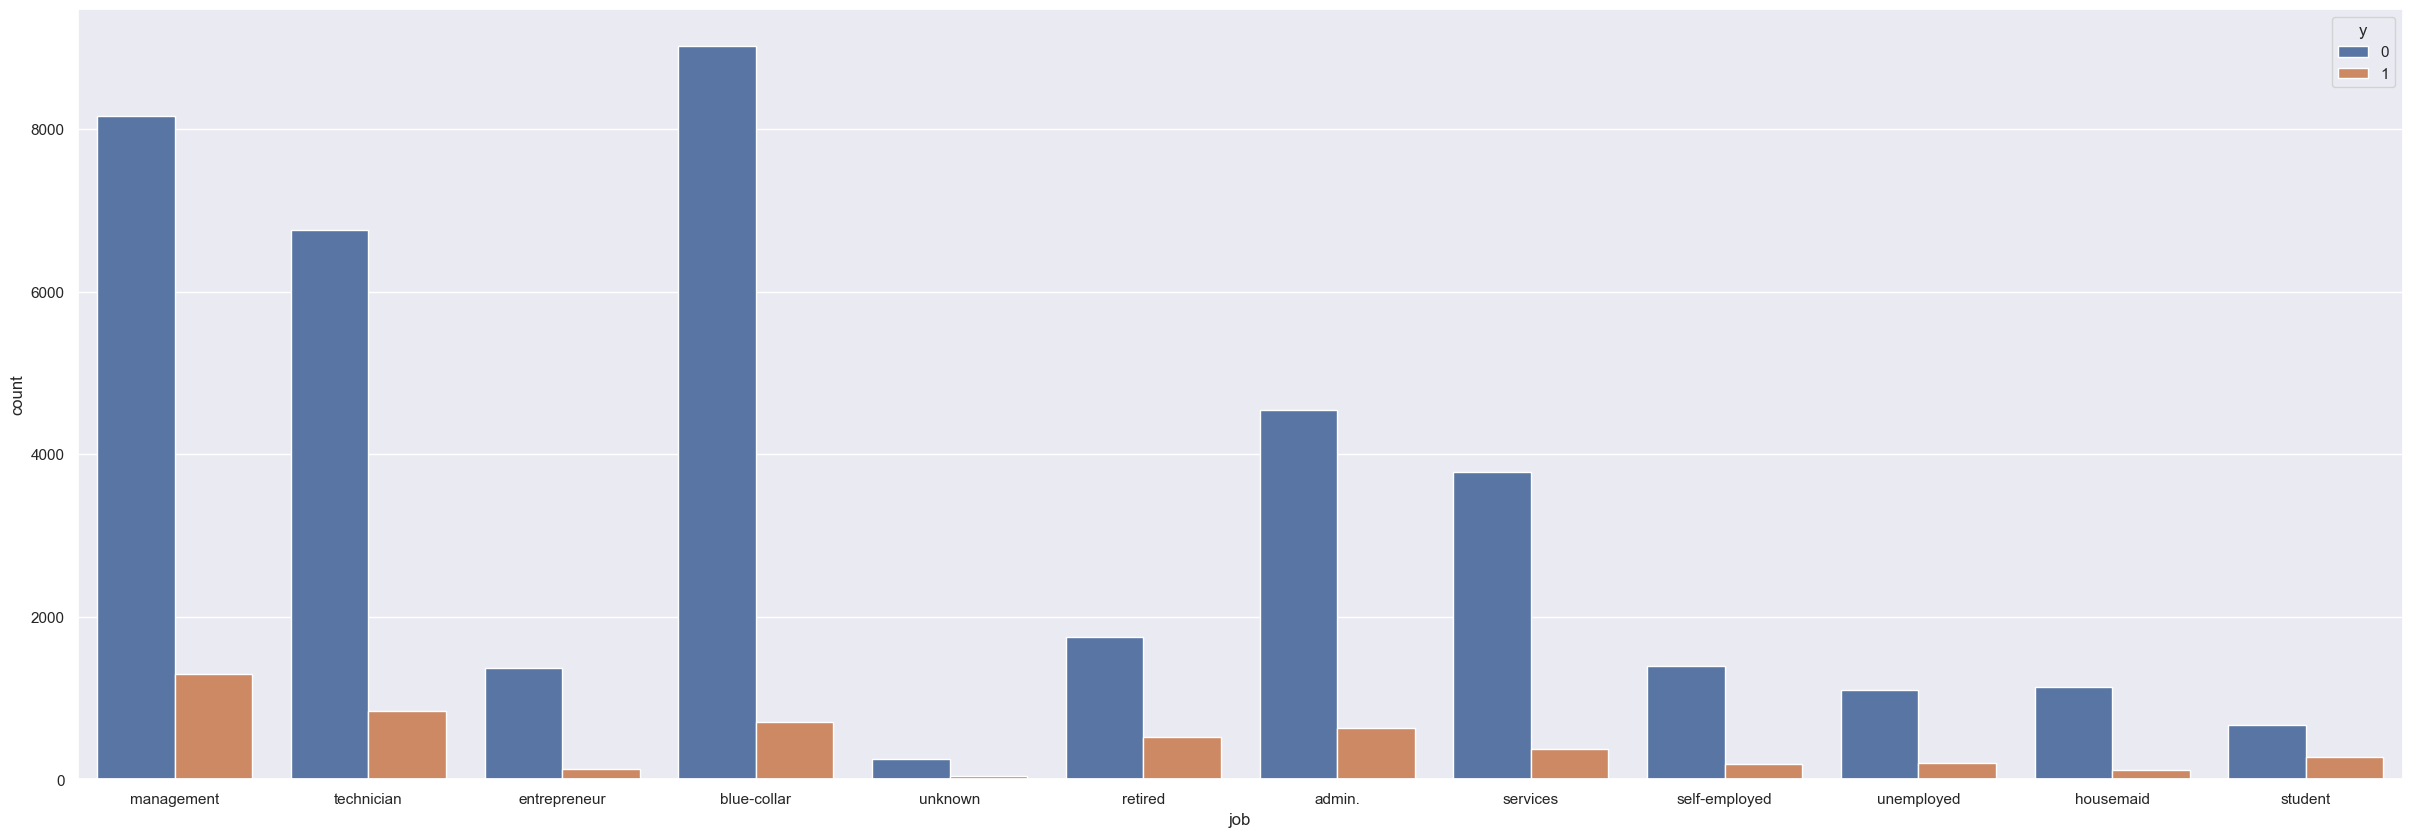

In [20]:
# no of y job base
plt.figure(figsize=(30,10))
sns.countplot('job',hue='y',data=df)

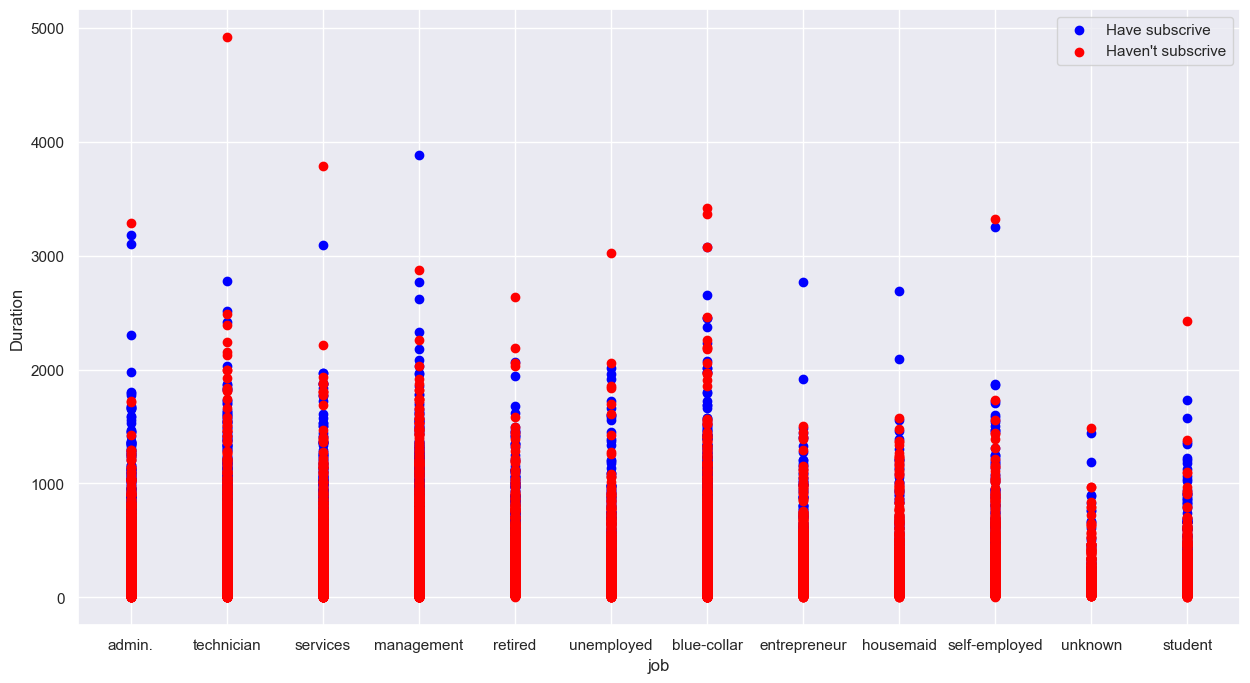

In [21]:
plt.figure(figsize=(15,8))
plt.scatter(x=df.job[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.job[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('job')
plt.ylabel('Duration')
plt.show()

In [22]:
# checking parcentage of people y in job
df.groupby(['job'])['y'].mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

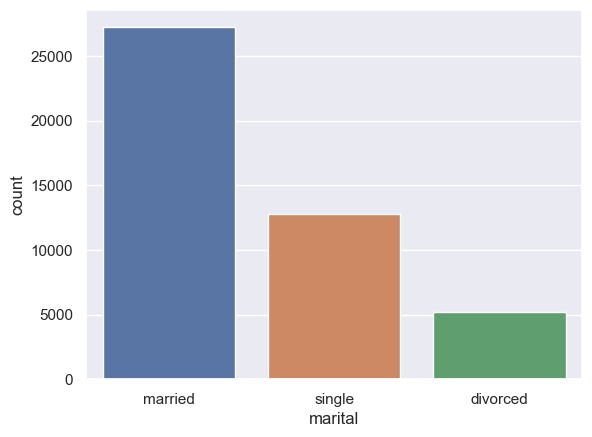

In [23]:
# making a count plot for marital column 
sns.countplot("marital",data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

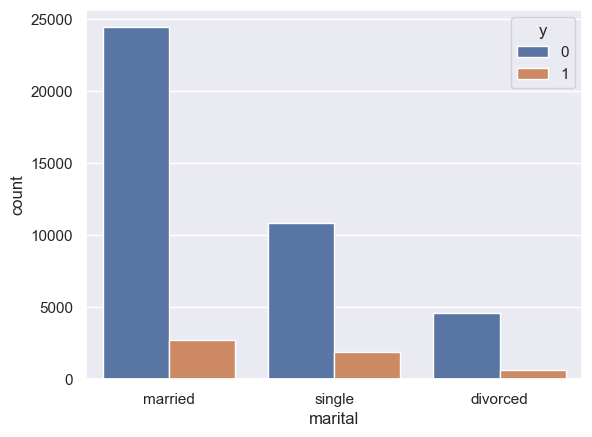

In [24]:
# no of y marital base
sns.countplot('marital',hue='y',data=df)

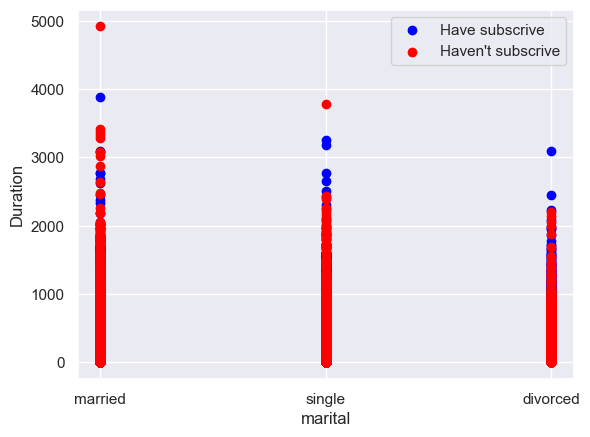

In [25]:
# plt.figure(figsize=(15,8))
plt.scatter(x=df.marital[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.marital[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('marital')
plt.ylabel('Duration')
plt.show()

In [26]:
# checking parcentage of people y in marital
df.groupby(['marital'])['y'].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: y, dtype: float64

In [27]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

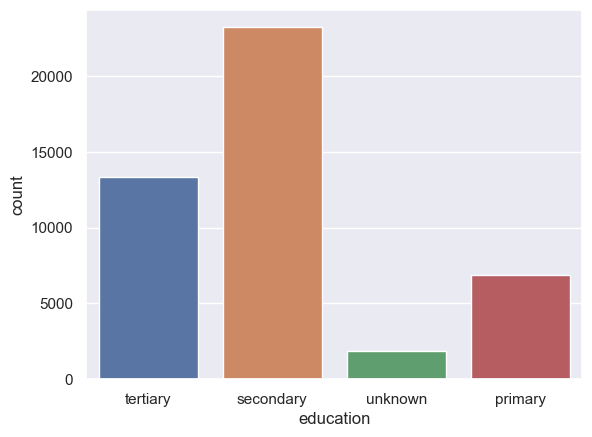

In [28]:
# making a count plot for Y column 
sns.countplot("education",data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

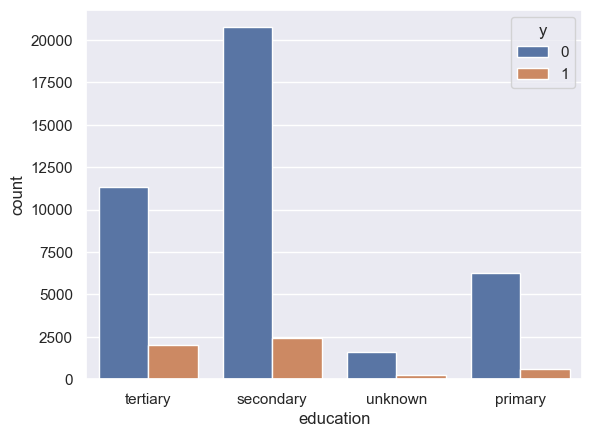

In [29]:
# no of y education base
sns.countplot('education',hue='y',data=df)

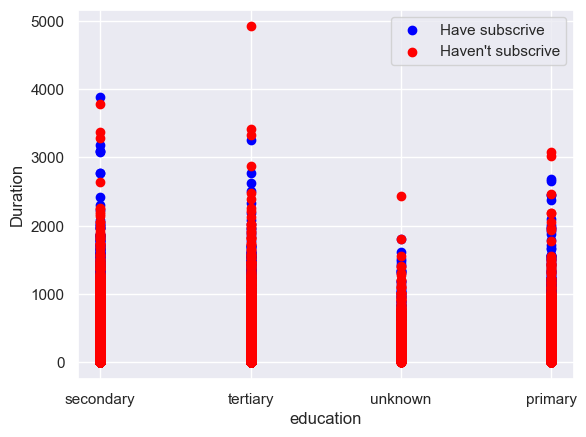

In [30]:
plt.scatter(x=df.education[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.education[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('education')
plt.ylabel('Duration')
plt.show()

In [31]:
# checking parcentage of people y in education
df.groupby(['education'])['y'].mean()

education
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: y, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

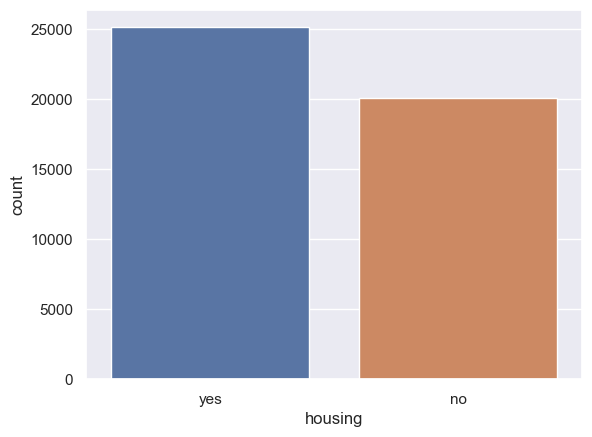

In [32]:
# making a count plot for housing column 
sns.countplot("housing",data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

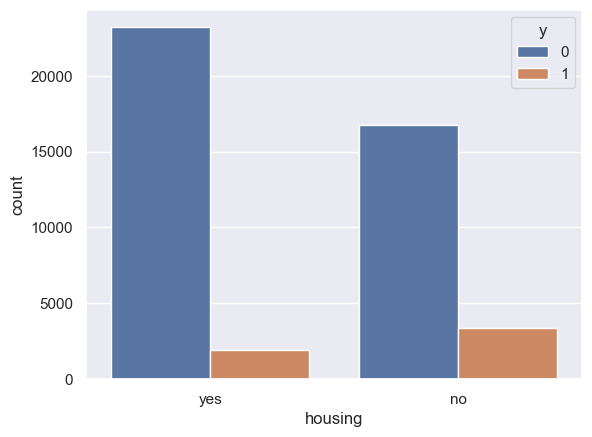

In [33]:
# no of y housing base
sns.countplot('housing',hue='y',data=df)

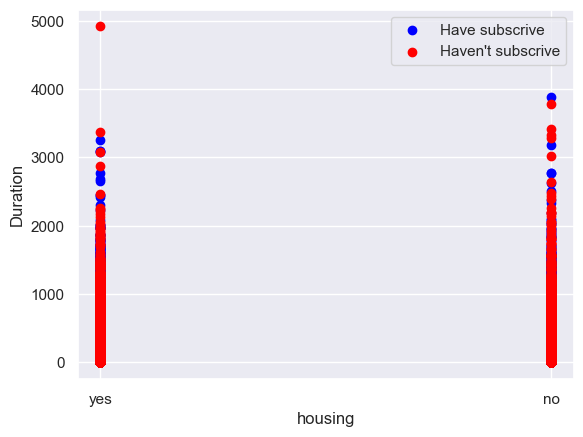

In [34]:
plt.scatter(x=df.housing[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.housing[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('housing')
plt.ylabel('Duration')
plt.show()

In [35]:
# checking parcentage of people y in housing
df.groupby(['housing'])['y'].mean()

housing
no     0.167024
yes    0.077000
Name: y, dtype: float64

In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

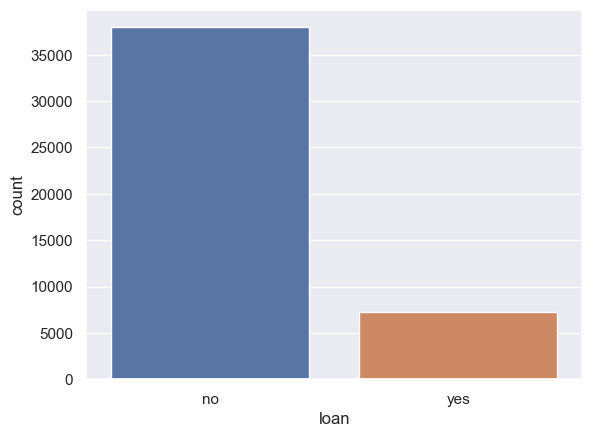

In [37]:
# making a count plot for loan column 
sns.countplot("loan",data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

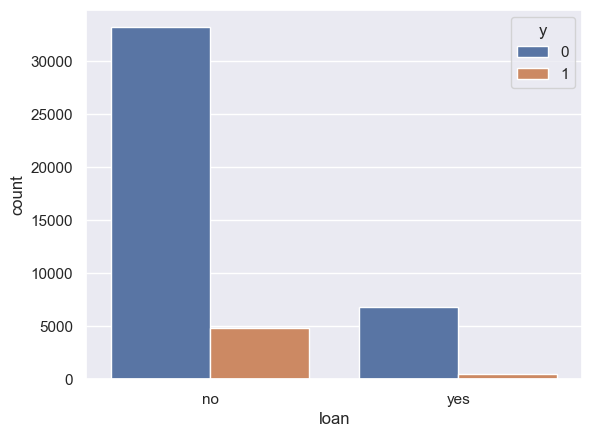

In [38]:
# no of y loan base
sns.countplot('loan',hue='y',data=df)

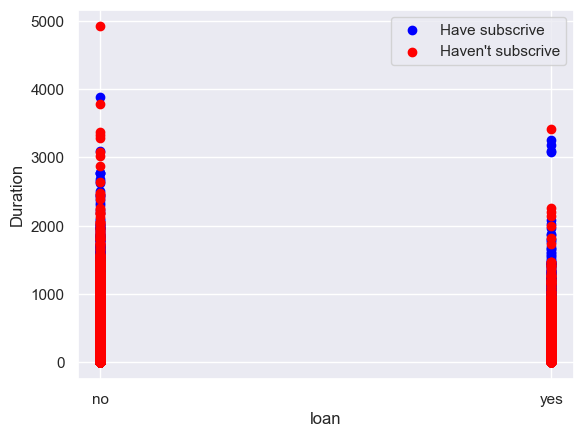

In [39]:
plt.scatter(x=df.loan[df.y==1],y=df.duration[df.y==1],c='blue')
plt.scatter(x=df.loan[df.y==0],y=df.duration[df.y==0],c='red')
plt.legend(['Have subscrive' , "Haven't subscrive"])
plt.xlabel('loan')
plt.ylabel('Duration')
plt.show()

In [40]:
# checking parcentage of people y in loan
df.groupby(['loan'])['y'].mean()

loan
no     0.126557
yes    0.066814
Name: y, dtype: float64

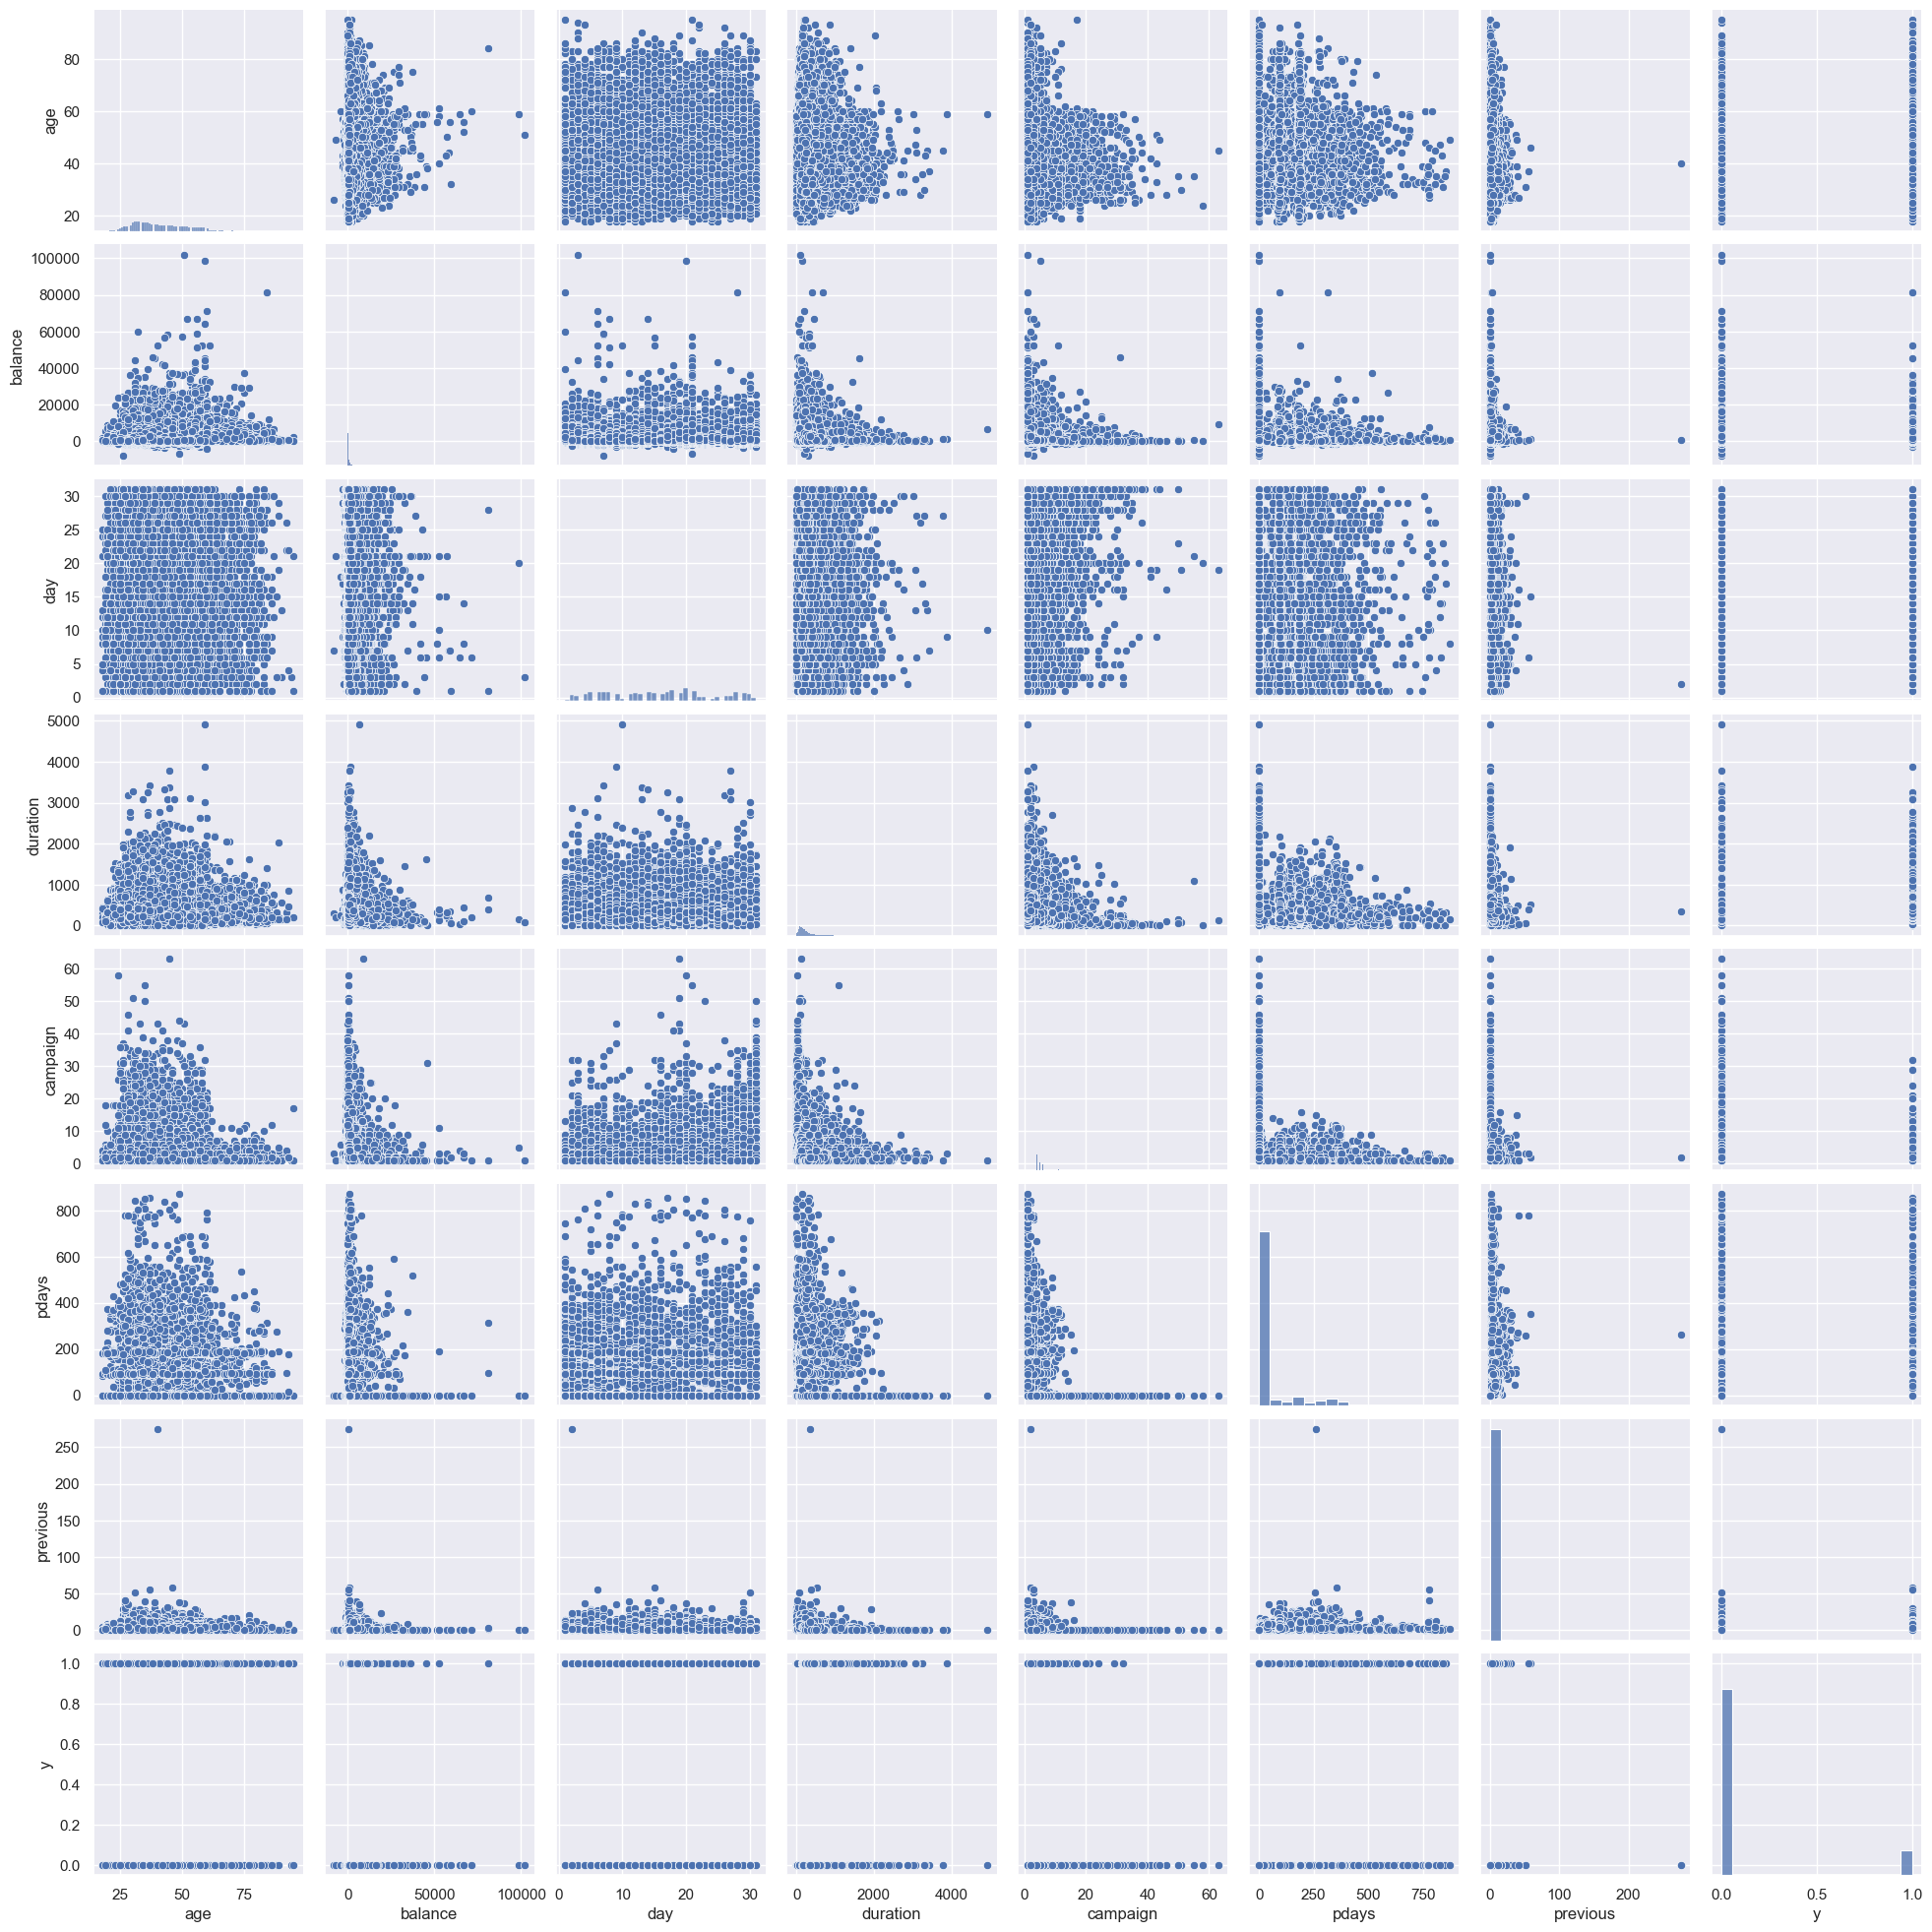

In [41]:
sns.pairplot(data=df)

In [42]:
# sns.pairplot(data=df,hue='y',vars=['age','job','marital','education','housing','loan','balance','duration'])

<AxesSubplot:>

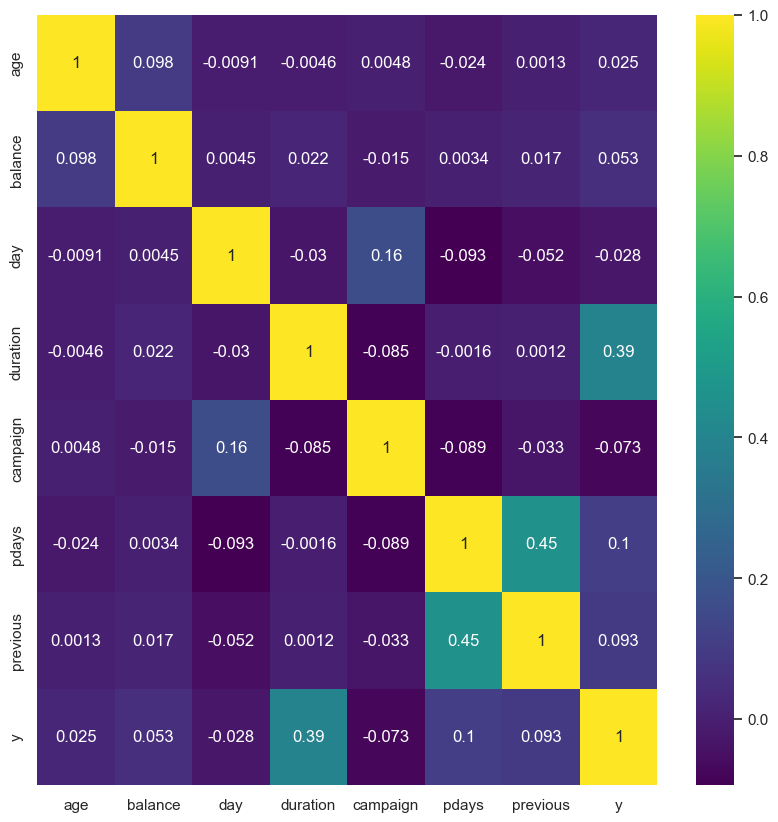

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

In [44]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [45]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
23107,51,services,married,primary,no,10150,yes,no,cellular,26,aug,157,5,-1,0,unknown,0
6621,26,entrepreneur,single,secondary,no,265,yes,no,unknown,28,may,593,1,-1,0,unknown,0
3549,33,management,single,secondary,yes,-174,yes,no,unknown,15,may,156,5,-1,0,unknown,0
21523,60,retired,married,secondary,no,374,no,no,cellular,19,aug,276,2,-1,0,unknown,0


# encoding

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [47]:
# Encoding categorical columns
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [48]:
# Encoding categorical columns
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [49]:
# Encoding categorical columns
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [50]:
# Encoding categorical columns
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [51]:
# Encoding categorical columns
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [52]:
# Encoding categorical columns
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [53]:
# Replacing all categorical columns 
df.replace({'job':{ 'blue-collar' : 0,
                    'management'  : 1,    
                   'technician'   : 2,
                    'admin.'      : 3, 
                    'services'    : 4,
                    'retired'     : 5,
                    'self-employed':6,
                    'entrepreneur' :7,
                    'unemployed'   :8,
                    'housemaid'    :9,
                    'student'      :10,
                    'unknown'      :11, },
            'marital':{'married':0,'single':1,'divorced':2},
            'education':{'secondary':0,'tertiary':1,'primary':2,'unknown':3},
            'default':{'no':0,'yes':1},
            'housing':{'no':0,'yes':1},
            'loan':{'no':0,'yes':1}
                      },inplace=True)

In [54]:
# Drop columns
df.drop(columns=['contact','day','month','poutcome'],inplace=True)

In [55]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
44083,29,1,1,3,0,560,0,0,212,1,92,2,0
44019,22,9,1,0,0,1796,0,0,369,3,-1,0,1
31374,31,4,0,0,0,447,0,0,220,3,-1,0,1
39536,35,0,1,0,0,142,1,0,293,2,19,3,0
17298,26,4,0,0,0,4,1,0,201,2,-1,0,0


# pre-modeling

In [56]:
x=df.drop(columns=['y'])
y=df.y

In [57]:
x.shape

(45211, 12)

In [58]:
y.shape

(45211,)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Using LogisticRegression

In [60]:
Lor=LogisticRegression()
Lor.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
Lor.score(x_test,y_test)

0.8889748977109366

In [62]:
train_score = Lor.score(x_train,y_train)
print(train_score)

test_score = Lor.score(x_test,y_test)
print(test_score)

0.8888796726387967
0.8889748977109366


In [63]:
print(classification_report(y_test,Lor.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.57      0.18      0.28      1049

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [64]:
print(confusion_matrix(y_test,Lor.predict(x_test)))

[[7848  146]
 [ 858  191]]


# Using RandomForestClassifier

In [65]:
Rm = RandomForestClassifier() 
Rm.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
Rm.score(x_test,y_test)

0.8983744332632976

In [67]:
train_score = Rm.score(x_train,y_train)
print(train_score)

test_score = Rm.score(x_test,y_test)
print(test_score)

0.999944702499447
0.8983744332632976


In [68]:
print(classification_report(y_test,Rm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.60      0.36      0.45      1049

    accuracy                           0.90      9043
   macro avg       0.76      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [69]:
print(confusion_matrix(y_test,Rm.predict(x_test)))

[[7745  249]
 [ 670  379]]


# Using DecisionTreeClassifier

In [88]:
Dc = DecisionTreeClassifier()
Dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred = Dc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
# Testing Data Evaluation 

y_pred = Dc.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7272  722]
 [ 629  420]]
**************************************************
Accuracy Score = 0.8506026761030632
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7994
           1       0.37      0.40      0.38      1049

    accuracy                           0.85      9043
   macro avg       0.64      0.66      0.65      9043
weighted avg       0.86      0.85      0.85      9043



In [91]:
# Training Data Evaluation 

y_pred = Dc.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31928     0]
 [    0  4240]]
**************************************************
Accuracy Score = 1.0
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31928
           1       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [ ]:
# bias - Variance Tradeoff 

# bias >> low
# variance >> high

# Overfitting

# Randoimisezed search

In [92]:
 DC= DecisionTreeClassifier(min_samples_split =  15,min_samples_leaf =  16,max_depth=3,criterion='gini')

In [93]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)

In [94]:
# Testing Data Evaluation 

y_pred = DC.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7774  220]
 [ 792  257]]
**************************************************
Accuracy Score = 0.8880902355413026
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7994
           1       0.54      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



In [95]:
# Training Data Evaluation 

y_pred = DC.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31119   809]
 [ 3169  1071]]
**************************************************
Accuracy Score = 0.8900132714001328
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     31928
           1       0.57      0.25      0.35      4240

    accuracy                           0.89     36168
   macro avg       0.74      0.61      0.64     36168
weighted avg       0.87      0.89      0.87     36168



In [ ]:
# Bias >> low 
# variance >> low

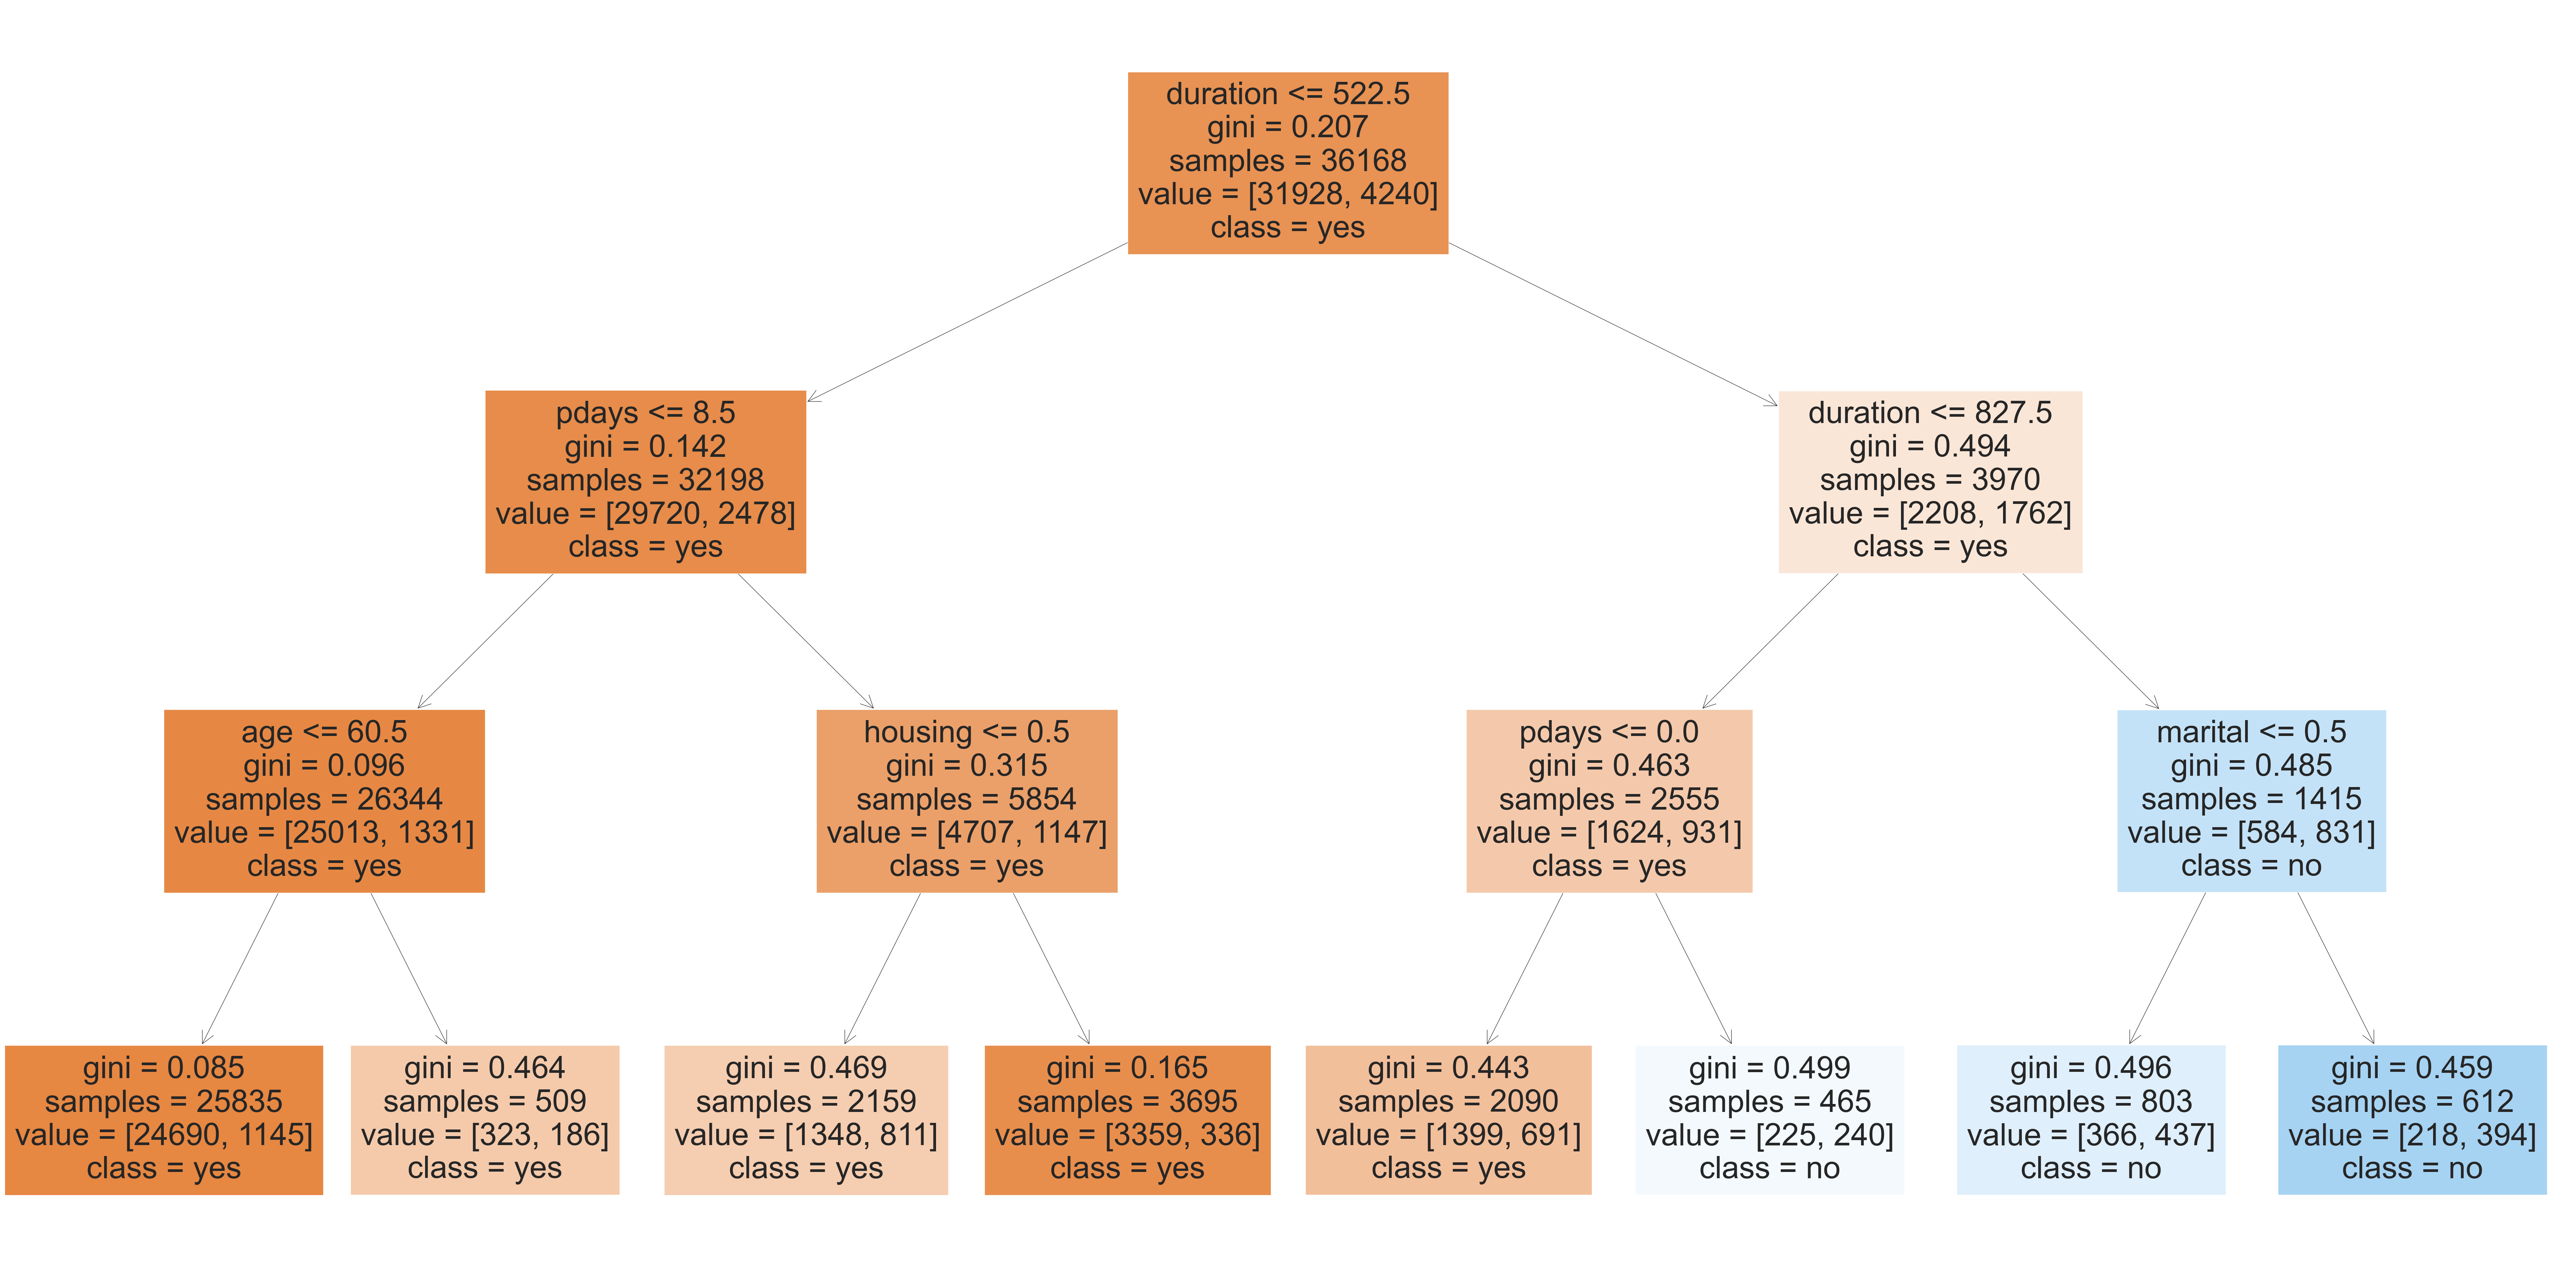

In [97]:
plt.figure(figsize=(100,50))
tree_fig = plot_tree(DC, feature_names=x.columns, filled=True, class_names=['yes','no'])
plt.savefig("decision_tree2.png")

# Save Model File

In [98]:
with open('model.pkl','wb') as file: 
    pickle.dump(DC,file)

# Read pickle file

In [99]:
pkl=pd.read_pickle('model.pkl')
pkl

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)